# [Шпаргалка по визуализации данных в Python с помощью Plotly](https://habr.com/ru/post/502958/)

## Импорт


Для статического отображения графиков, необходимо установить `plotly orca`, вариант установки:

```
!pip install plotly>=4.7.1 > /dev/null
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4 > /dev/null
```

In [ ]:
import numpy as np
import pandas as pd

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

## Общие настройки

Для возможности сохранения графиков в виде изображений и просмотра графиков без запуска кода следует изменить настроки:

`show_format = '' ` - интерактивный режим

`show_format = 'svg'` - статический режим

In [2]:
show_format = 'svg'

## Определение функций

In [3]:
x = np.arange(0, 5, 0.1)

def f(x):
    return x**2

def s(x):
    return np.sin(x)

def c(x):
    return np.cos(x)

def t(x):
    return np.tan(x)

# Увеличиваем плотность информации

## Тепловая карта

Добавление цветового обозначения величины.

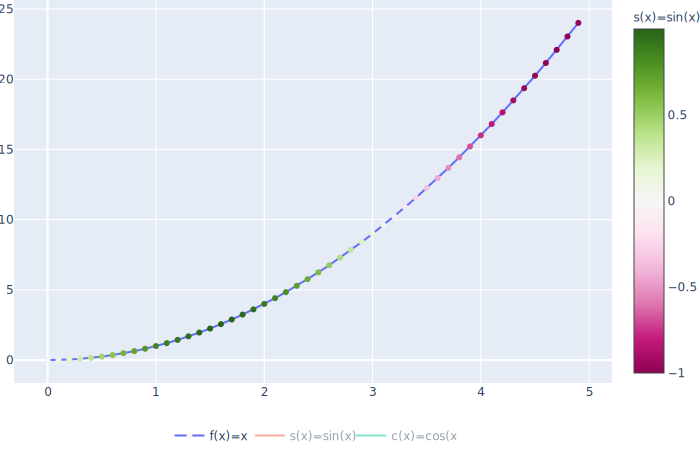

In [4]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers', 
                         name='f(x)=x<sup>2</sup>',
                         marker=dict(color=s(x),
                         colorbar=dict(title='s(x)=sin(x)'))
                         ))

fig.add_trace(go.Scatter(x=x, y=s(x), name='s(x)=sin(x)', visible='legendonly'))
fig.add_trace(go.Scatter(x=x, y=c(x), name='c(x)=cos(x)', visible='legendonly'))

fig.update_layout(legend_orientation='h',
                  legend=dict(x=0.5, xanchor='center'),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(hoverinfo='all',
                  hovertemplate='%{x}<br>%{y}')
fig.show(show_format)

Цветовая шкала через `colorscale`

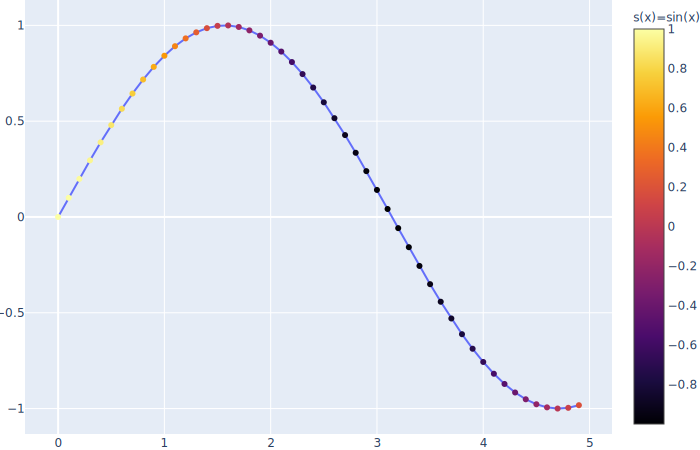

In [5]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=s(x), name='s(x)=sin(x)',
                         mode='lines+markers', 
                         marker=dict(color=c(x), colorscale='Inferno', 
                                     colorbar=dict(title='s(x)=sin(x)'))))

fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))

fig.show(show_format)

Выделение значений через размер маркеров

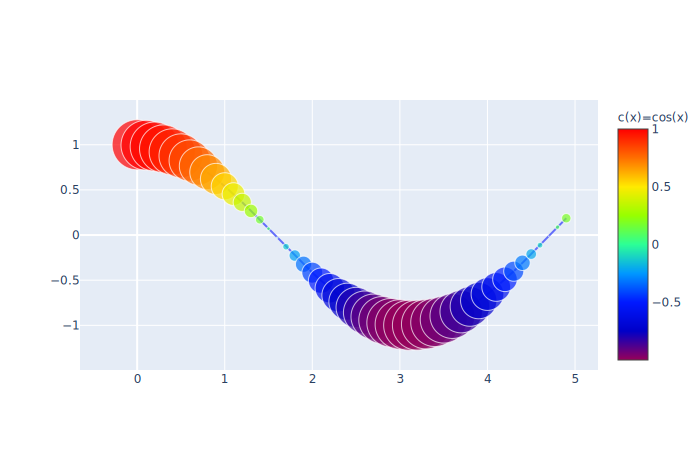

In [6]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=c(x), name='',
                         mode='lines+markers',
                         marker=dict(color=c(x), colorscale='Rainbow',
                                     colorbar=dict(title='c(x)=cos(x)'),
                                     size=50*abs(c(x)))))
fig.show(show_format)